In [1]:
import math

# Define the TEN_MASK constant
TEN_MASK = 1023  # ten bits

def tenbit(packd, count, upack):
    required_len_packd = math.ceil(count * (10.0 / 8.0))

    if count > len(upack):
        raise ValueError(f"expected output buffer to be {count} bytes, got {len(upack)} bytes")

    if required_len_packd > len(packd):
        raise ValueError(f"expected input to be at least {required_len_packd} bytes, it was {len(packd)} bytes")

    packd = list(packd[:required_len_packd])[::-1]  # Reverse the list
    chunker = [packd[i:i + 5] for i in range(0, len(packd), 5)]  # Create chunks of size 5
    remain = packd[len(chunker) * 5:]  # Get the remainder

    for idx, chnk in enumerate(chunker):
        # Convert chunk to a long integer
        long = int.from_bytes(chnk + [0, 0, 0], byteorder='big')

        b4 = long & TEN_MASK
        b3 = (long >> 10) & TEN_MASK
        b2 = (long >> 20) & TEN_MASK
        b1 = (long >> 30) & TEN_MASK

        base_idx = idx * 4
        upack[base_idx:base_idx + 4] = [b1, b2, b3, b4]

    if remain:
        long_bytes = remain + [0] * (8 - len(remain))
        long = int.from_bytes(long_bytes, byteorder='little')

        count_remain = count % 4
        start = count - count_remain
        for idx in range(count_remain):
            upack[start + idx] = ((long >> (10 * idx)) & TEN_MASK)
    return upack


In [2]:
with open("raw_data.bin","rb") as f:
    raw_data = f.read()
    

In [3]:
len(raw_data)

16224000

In [9]:
count = 4160*3120

In [10]:
import numpy as np
upack = np.zeros(count)

In [11]:
vj = tenbit(raw_data, count, upack)

In [14]:
image_array = vj.reshape(3120, 4160)

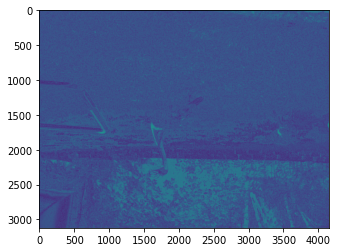

In [15]:
import matplotlib.pyplot as plt
plt.imshow(image_array)  # Use 'gray' for grayscale images
plt.show()

In [18]:
import cv2
cv2.imwrite("rust.jpeg",image_array) 

True